## What is HR analytics?

### Human resource analytics is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

## What is attrition in business?

### Attrition in business describes a gradual but deliberate reduction of staff numbers that occurs as employees retire or resign and are not replaced. The term is also sometimes used to describe the loss of customers or clients as they mature beyond a product or company's target market without being replaced by a younger generation.

## How attrition affect a company?

#### A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

## What are Positive and Negative attrition?

### Positive attrition:
#### Positive attrition refers to staff turnover that actually benefits the organization. Think of an employee who is a poor performer, makes many errors, has difficulty working with others, delivers low quality customer service and/or uses sick leave and vacation time as the hours are earned. When the employee quits, the organization benefits because now the supervisor can replace the low performer employee with someone who is better for the organization.

### Negative attrition:
#### Negative attrition refers to the loss of an employee the organization would like to keep. Qualified and skilled employees leave for a variety of reasons, and it is often challenging to find an equally skilled replacement. Negative attrition, especially in industries with the highest turnover rates, is expensive. The organization must once again recruit, assess, hire and train a new employee, and until the position is filled, team productivity declines.

#### Our Objectives:
#### •	Study the HR employee attrition data to identify the patters and causes of attrition with respect to various parameters.
#### •	Identify the important parameter and generate helpful insights from them.
#### •	Build model to predict if the employee is unsatisfied and will resign or is satisfied and will stay.
#### •	Compare the parameters of a satisfied and an unsatisfied employee to come up with idea of what can be improved.
#### •	Identify future attrition early so that proper measures can be taken on time. 

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
pd.set_option('display.max_columns', None)
data=pd.read_csv('IBM.csv')
data.head()                             

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [193]:
print('Total number of rows:',data.shape[0], 'and columns:', data.shape[1])

Total number of rows: 1470 and columns: 35


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### There are 25 Numerical Variables and 9 Categorical Variables 

In [195]:
# Looking into Numerical Features 
data.describe(include = 'int64')                   

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [196]:
# Looking into the Categorical Features
data.describe(include='object')  

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [197]:
data[['DailyRate','HourlyRate','MonthlyRate']].describe()

,DailyRate,HourlyRate,MonthlyRate
count,1470.000000,1470.000000,1470.000000
mean,802.485714,65.891156,14313.103401
std,403.509100,20.329428,7117.786044
min,102.000000,30.000000,2094.000000
25%,465.000000,48.000000,8047.000000
50%,802.000000,66.000000,14235.500000
75%,1157.000000,83.750000,20461.500000
max,1499.000000,100.000000,26999.000000


In [198]:
# Counting missing values 
pd.DataFrame({'Count':data.isnull().sum()})

,Count
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [199]:
# Removing insignificant columns
data.drop(['EmployeeCount','Over18', 'StandardHours'],axis=1,inplace=True) 

# *Feature Analysis*

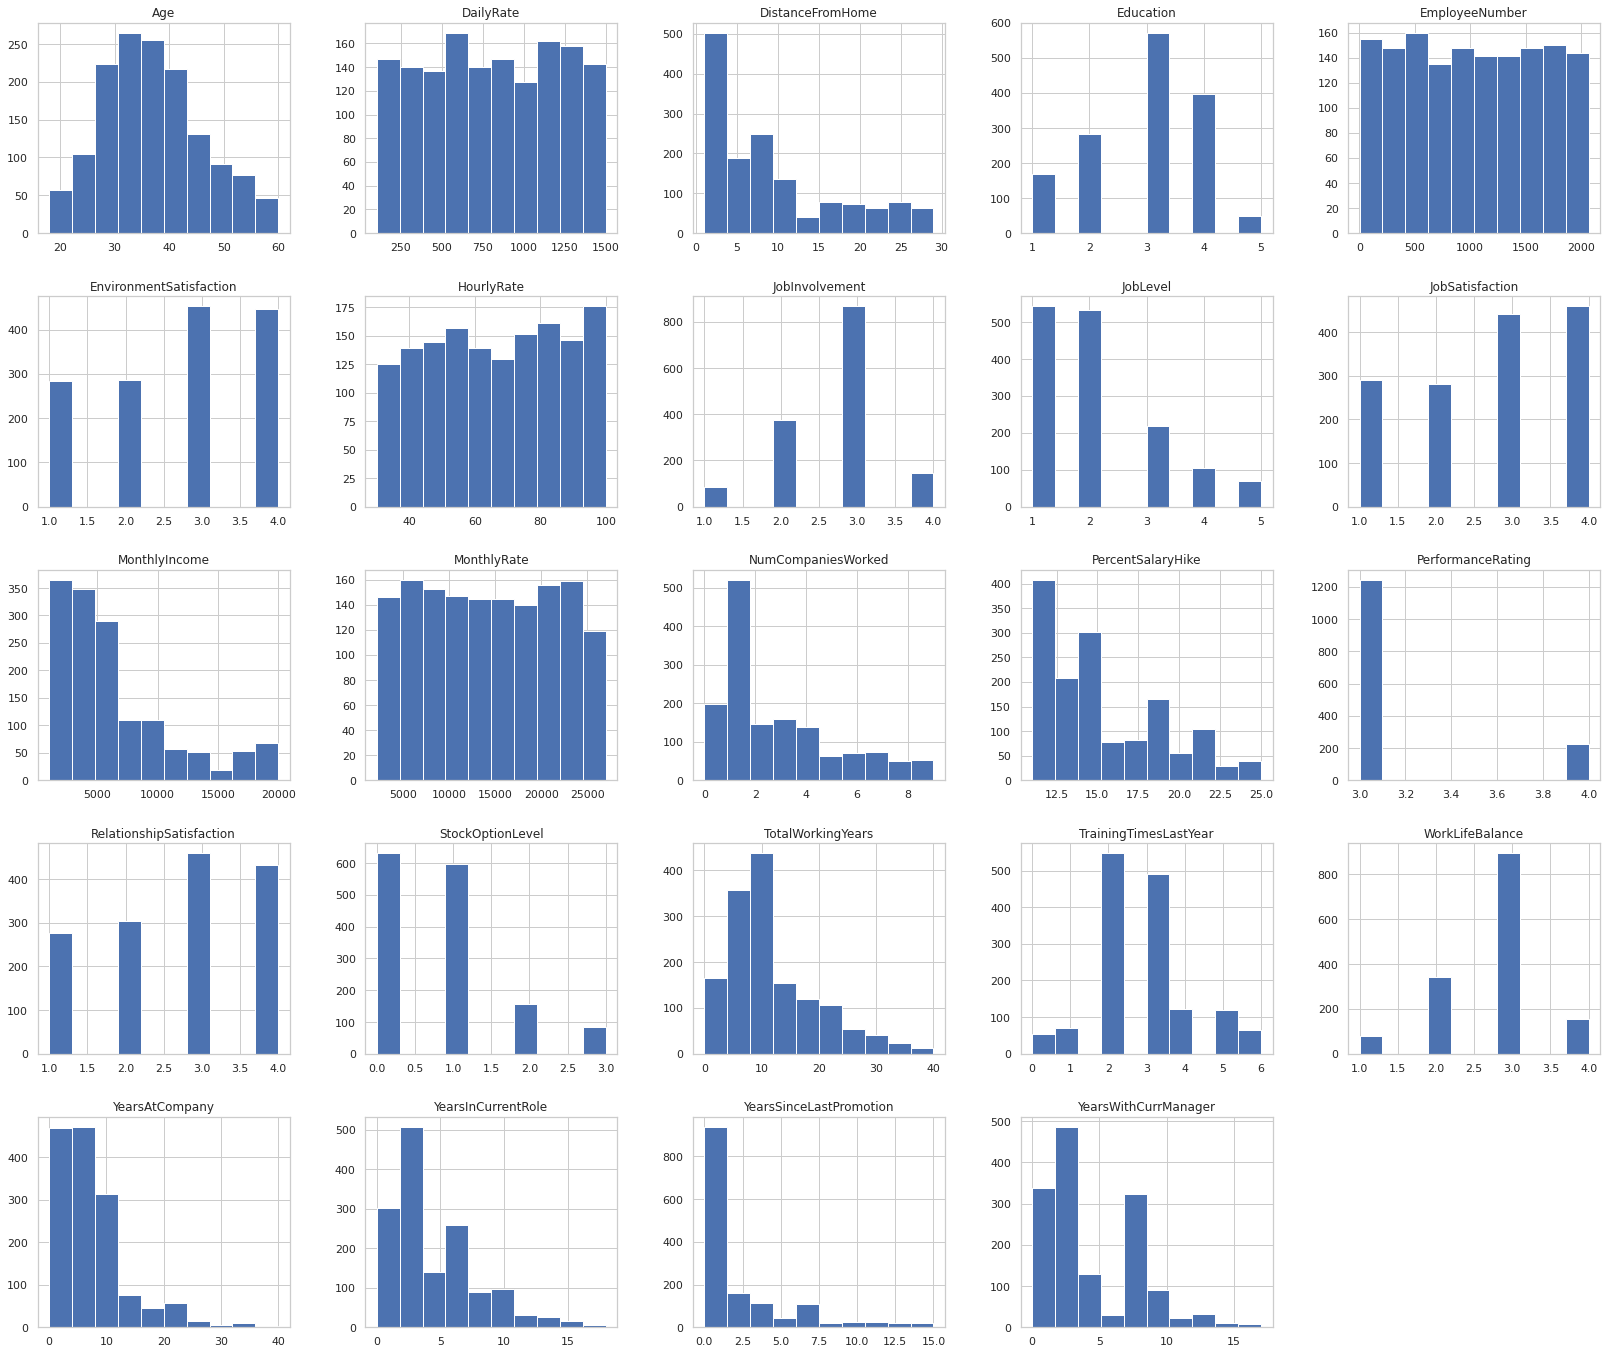

In [200]:
data.hist(figsize=(28,24))
plt.show()

No     1233
Yes     237
Name: Attrition, dtype: int64


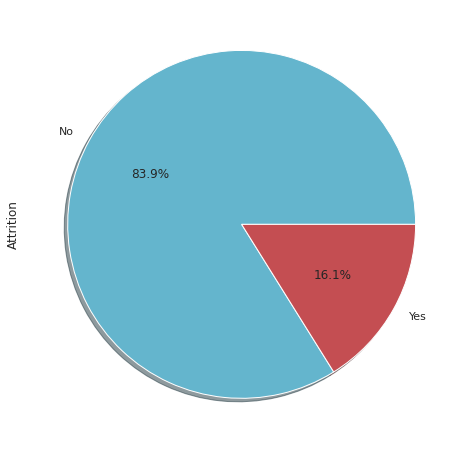

In [201]:
plt.figure(figsize=(20,8))
data['Attrition'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,colors=['c','r'])
print(data['Attrition'].value_counts())

In [202]:
#These are the numerical columns with high skewness 
for i in data.select_dtypes(exclude='O'):
    if data[i].skew() > 0.9:
        print(i,':',data[i].skew())             

DistanceFromHome : 0.9581179956568269
JobLevel : 1.0254012829518246
MonthlyIncome : 1.3698166808390662
NumCompaniesWorked : 1.026471111968205
PerformanceRating : 1.921882702142603
StockOptionLevel : 0.9689803167738937
TotalWorkingYears : 1.1171718528128527
YearsAtCompany : 1.7645294543422085
YearsInCurrentRole : 0.9173631562908262
YearsSinceLastPromotion : 1.9842899833524859


# *Exploratory Data Analysis*

## 1. Gender vs Attrition

In [203]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['Gender'])


Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


In [204]:
#comparision with MonthlyIncome
pd.pivot_table(data=data,index=['Gender'],values=['MonthlyIncome'],aggfunc='mean')


,MonthlyIncome
Gender,
Female,6686.566327
Male,6380.507937


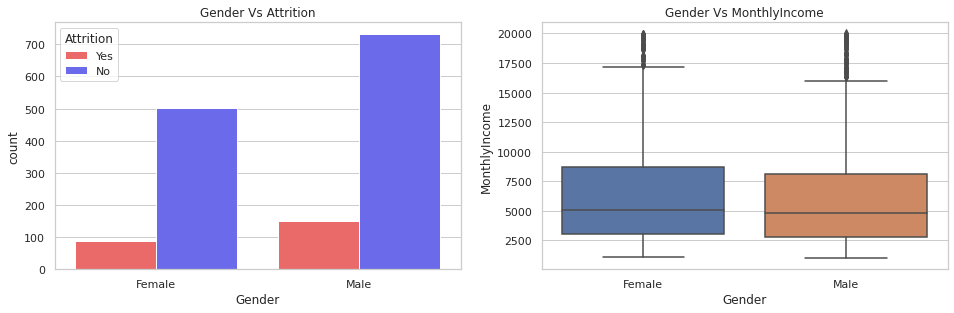

In [205]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.title('Gender Vs Attrition')
sns.countplot(x=data['Gender'],hue=data['Attrition'],palette='seismic_r')

plt.subplot(222)
plt.title('Gender Vs MonthlyIncome')
sns.boxplot(x=data['Gender'],y=data['MonthlyIncome'])

plt.show()

### Key Inferences from Gender vs Attrition
* Males have a higher rate of attrition 
* Females are earning a little higher than males 

## 2. Department vs Attrition

In [206]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['Department'])


Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [207]:
#comparision with MonthlyIncome
pd.pivot_table(data=data,index=['Department'],values=['MonthlyIncome'],aggfunc='mean')


,MonthlyIncome
Department,
Human Resources,6654.507937
Research & Development,6281.252862
Sales,6959.172646


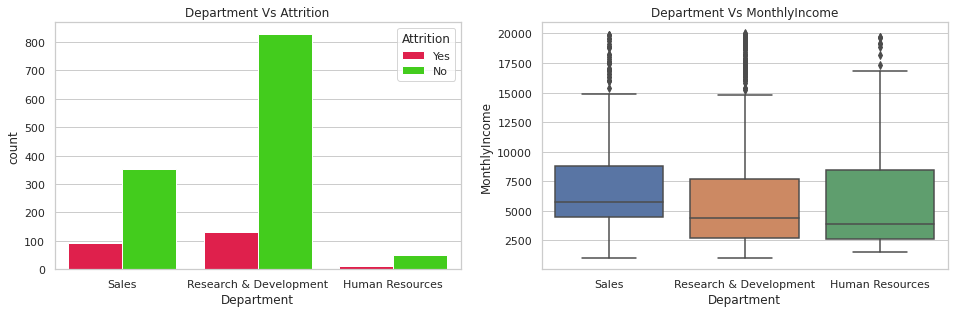

In [208]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.title('Department Vs Attrition')
sns.countplot(x=data['Department'],hue=data['Attrition'],palette='prism_r')

plt.subplot(222)
plt.title('Department Vs MonthlyIncome')
sns.boxplot(x=data['Department'],y=data['MonthlyIncome'])

plt.show()

### Key Inferences from Department vs Attrition 
* Sales Department has a higher rate of attrition 
* Sales employes are earning a little higher than other 

## 3. JobRole vs Attrition

In [209]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['JobRole'])


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


In [210]:
#comparision with MonthlyIncome
pd.pivot_table(data=data,index=['JobRole'],values=['MonthlyIncome'],aggfunc='mean')


,MonthlyIncome
JobRole,
Healthcare Representative,7528.763359
Human Resources,4235.750000
Laboratory Technician,3237.169884
Manager,17181.676471
Manufacturing Director,7295.137931
Research Director,16033.550000
Research Scientist,3239.972603
Sales Executive,6924.279141
Sales Representative,2626.000000


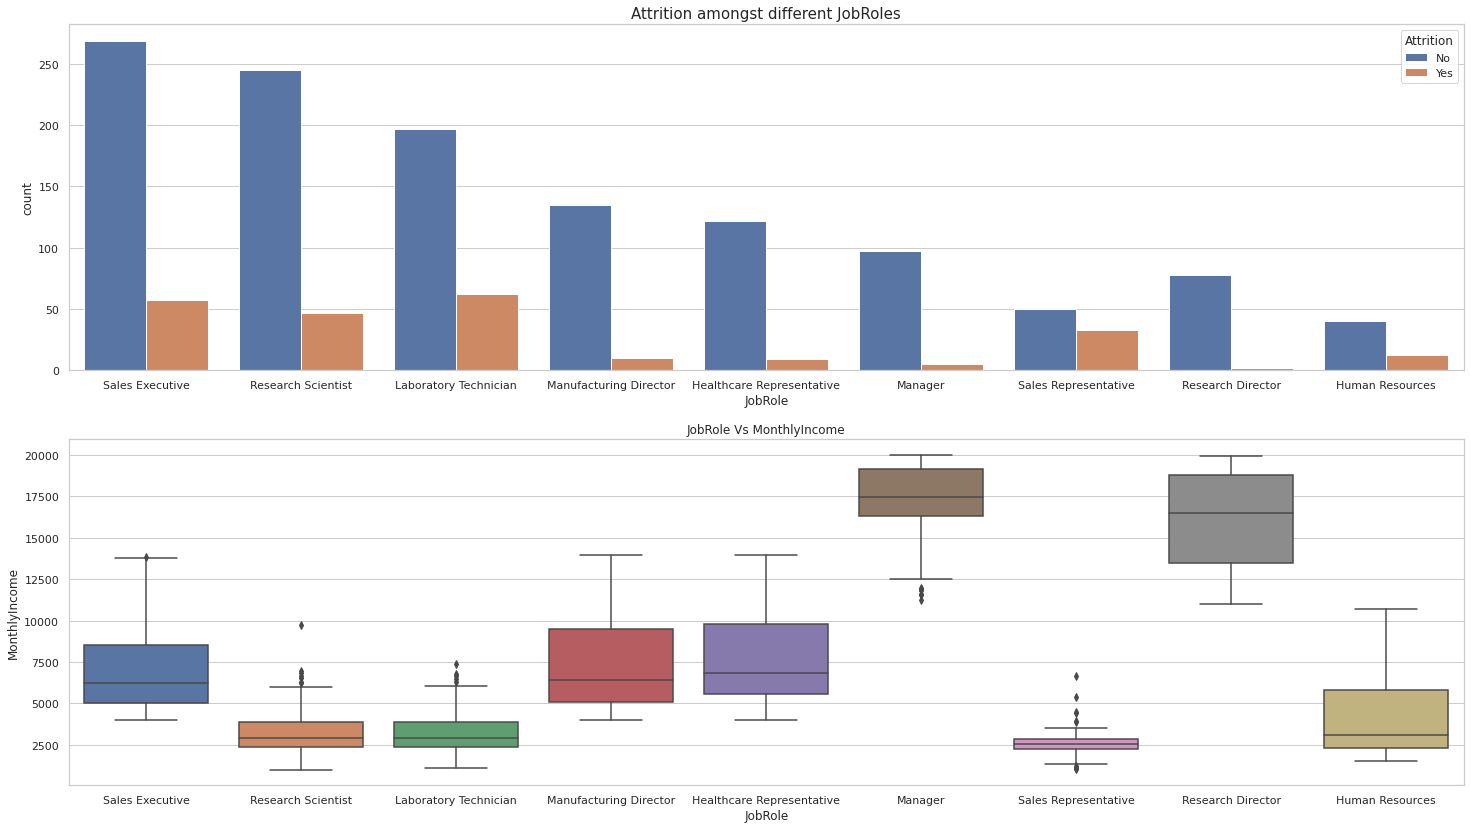

In [211]:
plt.figure(figsize=(25,14))

plt.subplot(211)
plt.title('JobRole Vs Attrition')
sns.countplot(x=data['JobRole'],hue=data['Attrition'].sort_values(ascending=True))
plt.title('Attrition amongst different JobRoles',size=15)


plt.subplot(212)
plt.title('JobRole Vs MonthlyIncome')
sns.boxplot(x=data['JobRole'],y=data['MonthlyIncome'])

plt.show()

### Key Inferences from JobRole vs Attrition 
* Sales Representative and Lab Technicians have a high attrition rate.

## 4. YearsInCurrentRole vs Attrition

In [212]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['YearsInCurrentRole'])


YearsInCurrentRole,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Attrition,,,,,,,,,,,,,,,,,,,
No,171,46,304,119,89,35,35,191,82,61,27,22,9,13,10,6,7,4,2
Yes,73,11,68,16,15,1,2,31,7,6,2,0,1,1,1,2,0,0,0


In [213]:
#comparision with MonthlyIncome
pd.pivot_table(data=data,index=['YearsInCurrentRole'],values=['MonthlyIncome'],aggfunc='mean')


,MonthlyIncome
YearsInCurrentRole,
0,5082.487705
1,5416.298246
2,5179.615591
3,5522.644444
4,6153.701923
5,5502.333333
6,10585.945946
7,7237.351351
8,8563.808989


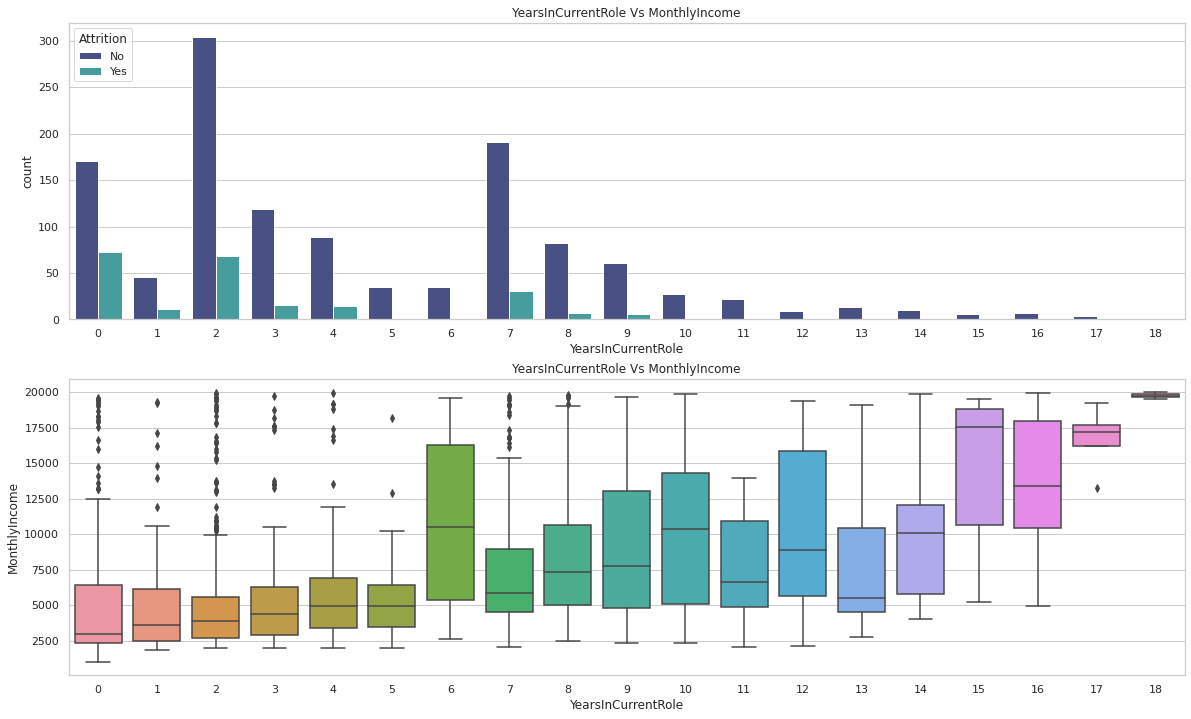

In [214]:
plt.figure(figsize=(20,12))

plt.subplot(211)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.countplot(x=data['YearsInCurrentRole'],hue=data['Attrition'].sort_values(ascending=True),palette='mako')


plt.subplot(212)
plt.title('YearsInCurrentRole Vs MonthlyIncome')
sns.boxplot(x=data['YearsInCurrentRole'],y=data['MonthlyIncome'])

plt.show()

### Key Inferences from YearsInCurrentRole vs Attrition 
* Employees with 7,8 and 9 YearsInCurrentRole contribute to 21.5% of the total attrition rate in the organisation 
* Employee with 6 years in Current Role is earning more than an employee carrying 14 years in Current Role
* Need to come up with better stock options for people with more than 6+ years in Current Role as attrition seems to increase gradually with a drop in monthly income 

## 5. TotalWorkingYears vs Attrition

In [215]:
#comparision with attrition
pd.crosstab(data['Attrition'],data['TotalWorkingYears'])


TotalWorkingYears,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,6,41,22,33,51,72,103,63,87,86,177,29,43,33,27,35,34,30,23,19,28,33,19,20,15,13,13,7,13,10,7,8,9,6,4,3,6,4,1,0
Yes,5,40,9,9,12,16,22,18,16,10,25,7,5,3,4,5,3,3,4,3,2,1,2,2,3,1,1,0,1,0,0,1,0,1,1,0,0,0,0,2


In [216]:
#comparision with MonthlyIncome
pd.pivot_table(data=data,index=['TotalWorkingYears'],values=['MonthlyIncome'],aggfunc='mean').sort_values(by='MonthlyIncome')


,MonthlyIncome
TotalWorkingYears,
0,1523.636364
1,2208.827160
2,2650.193548
3,2781.047619
5,3476.659091
4,3614.428571
7,4171.308642
8,4209.252427
6,4215.256000


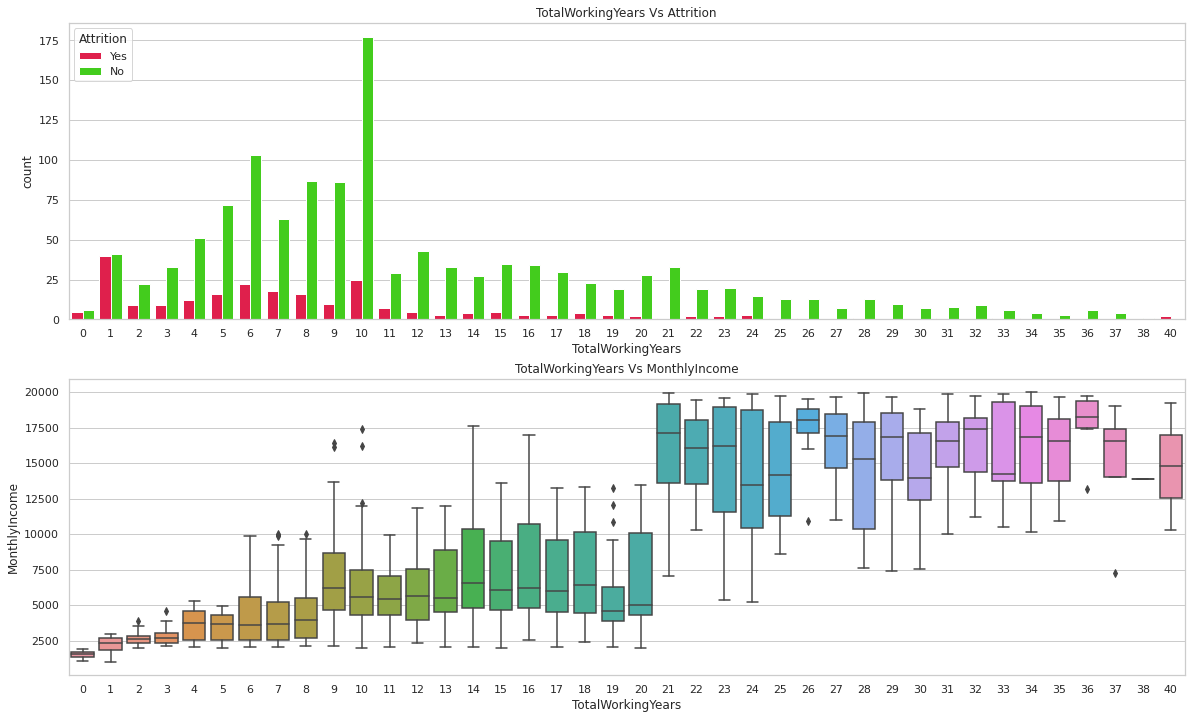

In [217]:
plt.figure(figsize=(20,12))

plt.subplot(211)
plt.title('TotalWorkingYears Vs Attrition')
sns.countplot(x=data['TotalWorkingYears'],hue=data['Attrition'],palette='prism_r')


plt.subplot(212)
plt.title('TotalWorkingYears Vs MonthlyIncome')
sns.boxplot(x=data['TotalWorkingYears'],y=data['MonthlyIncome'])

plt.show()

### Key Inferences from TotalWorkingYears vs Attrition 
* An innovative structure needs to be implemented for employees with 1 year of experience as it is majorly contributing to the attrition % 
* Seems like the organisation has benefits in terms of income for people with 20+ years of experience 
* Why people with 6 years of experience earning the same as employees with 19 years of experience ?
* Why employees with 21 years of work experience earning as much as an employee with 40 years of experience?

# *Statistical Analysis* 

In [218]:
from scipy.stats import chi2_contingency,chisquare,f_oneway

## 1. Statistical analysis for categorical data types, Chisquare is performed 

In [219]:
cat_cols = list(data.describe(include = "O").columns)
print(cat_cols)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [220]:
chi_stat=[]
p_value=[]
for i in cat_cols:
    chi_res=chi2_contingency(np.array(pd.crosstab(data[i],data['Attrition'])))
    chi_stat.append(chi_res[0])
    p_value.append(chi_res[1])
chi_square=pd.DataFrame([chi_stat,p_value])
chi_square=chi_square.T
col=['Chi Square Value','P-Value']
chi_square.columns=col
chi_square.index=cat_cols

In [221]:
chi_square

,Chi Square Value,P-Value
Attrition,1462.614554,0.000000e+00
BusinessTravel,24.182414,5.608614e-06
Department,10.796007,4.525607e-03
EducationField,16.024674,6.773980e-03
Gender,1.116967,2.905724e-01
JobRole,86.190254,2.752482e-15
MaritalStatus,46.163677,9.455511e-11
OverTime,87.564294,8.158424e-21


In [222]:
#Obtaining categorical feature with P-value<0.05, means these features are dependent and have correlation with target variable
chi_square[chi_square["P-Value"]<0.05]

,Chi Square Value,P-Value
Attrition,1462.614554,0.000000e+00
BusinessTravel,24.182414,5.608614e-06
Department,10.796007,4.525607e-03
EducationField,16.024674,6.773980e-03
JobRole,86.190254,2.752482e-15
MaritalStatus,46.163677,9.455511e-11
OverTime,87.564294,8.158424e-21


In [223]:
features_p = list(chi_square[chi_square["P-Value"]<0.05].index)
print("Significant categorical Features:\n",features_p)

Significant categorical Features:
 ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']


## 2. statistical analysis for numerical data dtypes , ANOVA Test is performed

In [224]:
num_cols = list(data.describe(include = 'int64').columns)
print(num_cols)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [225]:
f_stat=[]
p_val=[]
for i in num_cols:
    atr_0=data[data['Attrition']=="No"][i]
    atr_1=data[data['Attrition']=="Yes"][i]
    a=f_oneway(atr_0,atr_1)
    f_stat.append(a[0])
    p_val.append(a[1])
anova=pd.DataFrame([f_stat,p_val])
anova=anova.T
cols=['F-STAT','P-VALUE']
anova.columns=cols
anova.index=num_cols

In [226]:
anova

,F-STAT,P-VALUE
Age,38.175887,8.356308e-10
DailyRate,4.726640,2.985816e-02
DistanceFromHome,8.968277,2.793060e-03
Education,1.446308,2.293152e-01
EmployeeNumber,0.164255,6.853276e-01
EnvironmentSatisfaction,15.855209,7.172339e-05
HourlyRate,0.068796,7.931348e-01
JobInvolvement,25.241985,5.677065e-07
JobLevel,43.215344,6.795385e-11
JobSatisfaction,15.890004,7.043067e-05


In [227]:
#Obtaining numerical feature with P-value<0.05, means these features are dependent and have correlation with target variable
anova[anova["P-VALUE"]<0.05]

,F-STAT,P-VALUE
Age,38.175887,8.356308e-10
DailyRate,4.726640,2.985816e-02
DistanceFromHome,8.968277,2.793060e-03
EnvironmentSatisfaction,15.855209,7.172339e-05
JobInvolvement,25.241985,5.677065e-07
JobLevel,43.215344,6.795385e-11
JobSatisfaction,15.890004,7.043067e-05
MonthlyIncome,38.488819,7.147364e-10
StockOptionLevel,28.140501,1.301015e-07
TotalWorkingYears,44.252491,4.061878e-11


In [228]:
features_p_n = list(anova[anova["P-VALUE"]<0.05].index)
print("Significant numerical Features:\n",features_p_n)

Significant numerical Features:
 ['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']


## Key Inference of Statistical Analysis
### There are 20 Features having a correlation with the Target Variable. These are:
'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager'